In [283]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import r2_score,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from mlxtend.plotting import plot_decision_regions


In [284]:
data=pd.read_csv("/Users/omgajipara/Desktop/Data Science/AI:ML/Machine Learning/Supervised Learning/Classification/DecisionTree/DesicionTree.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [285]:
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [286]:
data = data.drop(['User ID', 'Gender'], axis=1)


In [287]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [288]:
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

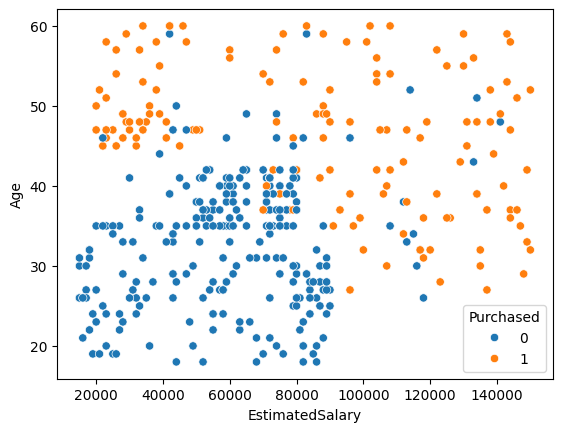

In [289]:
sns.scatterplot(x='EstimatedSalary',y='Age',data=data,hue='Purchased')
plt.show()

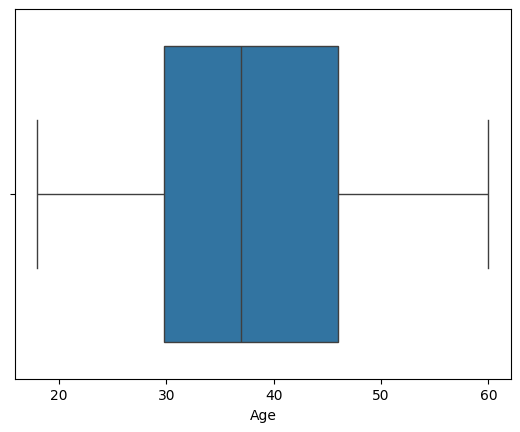

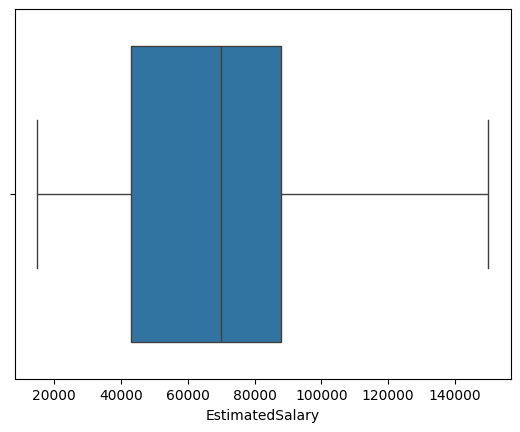

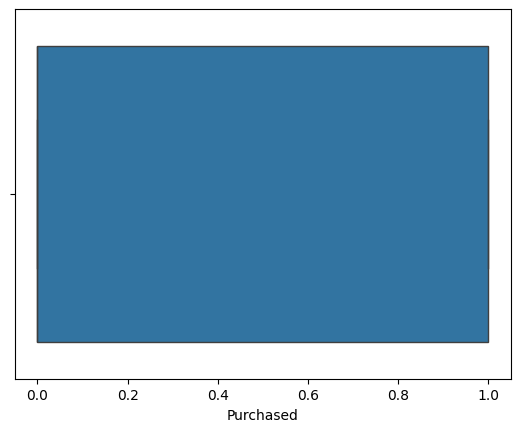

In [290]:
for i in data:
    sns.boxplot(x=i,data=data)
    plt.show()

# Over sampling

In [291]:
ru=RandomOverSampler()

In [292]:
x=data.iloc[:,:-1]
y=data['Purchased']


In [293]:
ru_x,ru_y=ru.fit_resample(x,y)


In [294]:
ru_y.value_counts()

Purchased
0    257
1    257
Name: count, dtype: int64

In [295]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Find best random_state
best_score = 0
best_state = 0

for state in range(101):
    X_train, X_test, y_train, y_test = train_test_split(ru_x, ru_y, test_size=0.2, random_state=state)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    acc = accuracy_score(y_test, model.predict(X_test))
    if acc > best_score:
        best_score = acc
        best_state = state

print(f"✅ Best Accuracy: {best_score:.4f} at random_state = {best_state}")


✅ Best Accuracy: 0.9320 at random_state = 37


In [296]:
x_train,x_test,y_train,y_test=train_test_split(ru_x,ru_y,test_size=0.2,random_state=85)


In [297]:
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [298]:
lr.score(x_test,y_test)

0.8932038834951457

In [299]:
lr.predict([[51,23000]])

/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [300]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [301]:
accuracy_score(y_test,lr.predict(x_test))

0.8932038834951457

In [302]:
precision_score(y_test,lr.predict(x_test))

0.8679245283018868

In [303]:
recall_score(y_test,lr.predict(x_test))

0.92

In [304]:
f1_score(y_test,lr.predict(x_test))

0.8932038834951457

In [305]:
cf=confusion_matrix(y_test,lr.predict(x_test))
cf


array([[46,  7],
       [ 4, 46]])

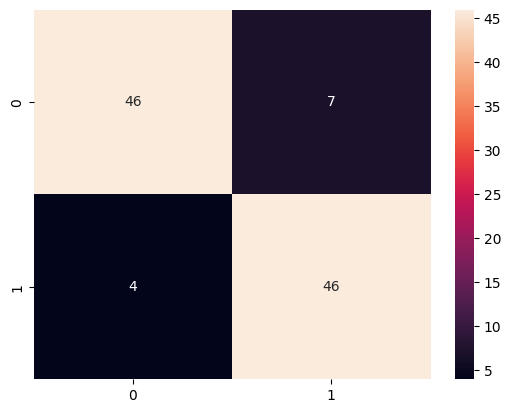

In [306]:

sns.heatmap(cf,annot=True)
plt.show()

/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


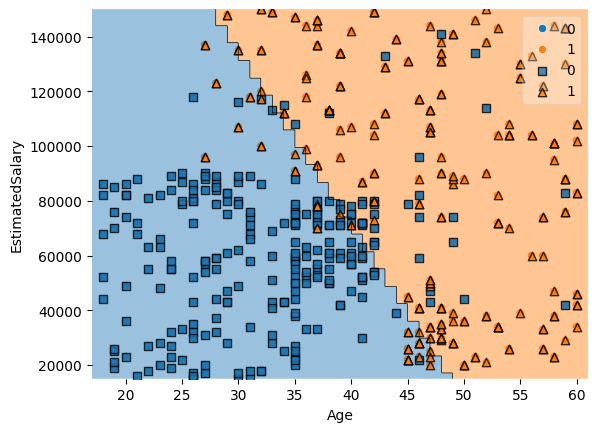

In [307]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=data, hue='Purchased')
plot_decision_regions(X=ru_x.to_numpy(), y=ru_y.to_numpy(), clf=lr)
plt.show()


In [308]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
